Configuring the model


In [121]:
from dotenv import load_dotenv
import os
load_dotenv()
os.environ["GOOGLE_API_KEY"] = os.getenv("GOOGLE_API_KEY") # here i configured my api key from .env file

In [122]:
from langchain_google_genai import ChatGoogleGenerativeAI
model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')
output = model.invoke("hi hello")
print(output.content)



Hi there! How can I help you today?


Configuring the embedding model 

In [123]:
from dotenv import load_dotenv
import os
load_dotenv()
os.environ["HUGGINGFACE_API_KEY"] = os.getenv("HUGGINGFACE_API_KEY") # here i configured my api key from .env file



In [124]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="BAAI/bge-small-en")
len(embeddings.embed_query("hi"))

384

LETS TAKE A DATA EMBEDED IT AND STORE IT IN VECTOR DATABASE

In [125]:
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [126]:
loader=DirectoryLoader("../data",glob="./*.txt",loader_cls=TextLoader) #here is the directory name data from parent directory

In [127]:
docs=loader.load()

In [128]:
docs

[Document(metadata={'source': '../data/Indiaeconomy.txt'}, page_content="Certainly! Here's a well-organized and detailed write-up on **India's economy in 2025** presented in paragraph format:\n\n---\n\n**India’s Economic Landscape in 2025**\n\nIndia stands tall in 2025 as one of the most dynamic and rapidly expanding economies in the world. With a nominal GDP of approximately **USD 4.19 trillion**, India is currently ranked **fourth globally**, just behind the U.S., China, and Germany. When adjusted for purchasing power parity (PPP), India's GDP climbs to **USD 17.65 trillion**, making it the **third-largest economy** worldwide. This robust economic performance is driven by structural reforms, technological advancement, and a favorable demographic dividend.\n\nThe **real GDP growth rate** for the fiscal year 2024–25 is estimated at **6.4%**, slightly lower than the previous year’s impressive 8.2% but still significantly higher than most other major economies. This pace confirms India’s

In [129]:
docs[0].page_content

"Certainly! Here's a well-organized and detailed write-up on **India's economy in 2025** presented in paragraph format:\n\n---\n\n**India’s Economic Landscape in 2025**\n\nIndia stands tall in 2025 as one of the most dynamic and rapidly expanding economies in the world. With a nominal GDP of approximately **USD 4.19 trillion**, India is currently ranked **fourth globally**, just behind the U.S., China, and Germany. When adjusted for purchasing power parity (PPP), India's GDP climbs to **USD 17.65 trillion**, making it the **third-largest economy** worldwide. This robust economic performance is driven by structural reforms, technological advancement, and a favorable demographic dividend.\n\nThe **real GDP growth rate** for the fiscal year 2024–25 is estimated at **6.4%**, slightly lower than the previous year’s impressive 8.2% but still significantly higher than most other major economies. This pace confirms India’s status as the **fastest-growing major economy** globally. Key contribut

In [130]:
text_splitter=RecursiveCharacterTextSplitter(
    chunk_size = 200,
    chunk_overlap = 50,
)

In [131]:
new_docs=text_splitter.split_documents(documents=docs)

In [132]:
new_docs

[Document(metadata={'source': '../data/Indiaeconomy.txt'}, page_content="Certainly! Here's a well-organized and detailed write-up on **India's economy in 2025** presented in paragraph format:\n\n---\n\n**India’s Economic Landscape in 2025**"),
 Document(metadata={'source': '../data/Indiaeconomy.txt'}, page_content='India stands tall in 2025 as one of the most dynamic and rapidly expanding economies in the world. With a nominal GDP of approximately **USD 4.19 trillion**, India is currently ranked **fourth'),
 Document(metadata={'source': '../data/Indiaeconomy.txt'}, page_content="trillion**, India is currently ranked **fourth globally**, just behind the U.S., China, and Germany. When adjusted for purchasing power parity (PPP), India's GDP climbs to **USD 17.65 trillion**,"),
 Document(metadata={'source': '../data/Indiaeconomy.txt'}, page_content="India's GDP climbs to **USD 17.65 trillion**, making it the **third-largest economy** worldwide. This robust economic performance is driven by

In [133]:
doc_string=[doc.page_content for doc in new_docs]

In [134]:
doc_string


["Certainly! Here's a well-organized and detailed write-up on **India's economy in 2025** presented in paragraph format:\n\n---\n\n**India’s Economic Landscape in 2025**",
 'India stands tall in 2025 as one of the most dynamic and rapidly expanding economies in the world. With a nominal GDP of approximately **USD 4.19 trillion**, India is currently ranked **fourth',
 "trillion**, India is currently ranked **fourth globally**, just behind the U.S., China, and Germany. When adjusted for purchasing power parity (PPP), India's GDP climbs to **USD 17.65 trillion**,",
 "India's GDP climbs to **USD 17.65 trillion**, making it the **third-largest economy** worldwide. This robust economic performance is driven by structural reforms, technological advancement, and a",
 'reforms, technological advancement, and a favorable demographic dividend.',
 'The **real GDP growth rate** for the fiscal year 2024–25 is estimated at **6.4%**, slightly lower than the previous year’s impressive 8.2% but still si

In [135]:
len(doc_string)

31

In [136]:
db=Chroma.from_documents(documents=new_docs, embedding=embeddings)

In [137]:
retriver=db.as_retriever(search_kwargs={"k":3})

In [138]:
retriver.invoke("growth of indian economy in 2025")

[Document(metadata={'source': '../data/Indiaeconomy.txt'}, page_content='India stands tall in 2025 as one of the most dynamic and rapidly expanding economies in the world. With a nominal GDP of approximately **USD 4.19 trillion**, India is currently ranked **fourth'),
 Document(metadata={'source': '../data/Indiaeconomy.txt'}, page_content='India stands tall in 2025 as one of the most dynamic and rapidly expanding economies in the world. With a nominal GDP of approximately **USD 4.19 trillion**, India is currently ranked **fourth'),
 Document(metadata={'source': '../data/Indiaeconomy.txt'}, page_content='In conclusion, India in 2025 is a picture of resilience and optimism. The country’s rapid transformation into a global economic power is being fueled by structural reforms, digital momentum, and a')]

USING PYDANTIC FOR CLASS CREATION

In [139]:

import operator
from typing import List
from pydantic import BaseModel , Field
from langchain.prompts import PromptTemplate
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,END

In [140]:
from pydantic import BaseModel, Field

In [141]:
class TopSelectionParser(BaseModel):
    Topic:str=Field(description="Select a topic")
    Reasoning:str=Field(description="reasoning behind Selecting a topic")

In [142]:
from langchain.output_parsers import PydanticOutputParser

In [143]:
parser =PydanticOutputParser(pydantic_object=TopSelectionParser)

In [144]:
parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "Select a topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "reasoning behind Selecting a topic", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}\n```'

In [145]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [146]:
AgentState = {}


In [147]:
AgentState["messages"]=[]

In [148]:
AgentState

{'messages': []}

In [149]:
AgentState["messages"].append("hello how are you?")

In [150]:
AgentState

{'messages': ['hello how are you?']}

In [151]:
AgentState["messages"].append("how is your health?")

In [152]:
AgentState

{'messages': ['hello how are you?', 'how is your health?']}

In [153]:
AgentState["messages"].append("what is your daily routine?")

In [154]:
AgentState

{'messages': ['hello how are you?',
  'how is your health?',
  'what is your daily routine?']}

In [155]:
AgentState["messages"][-1]

'what is your daily routine?'

In [156]:
AgentState["messages"][0]

'hello how are you?'

AGENT FUNCTIONALITY 🤖

In [221]:
## supervisor function that is first node in the graph
def function1(state:AgentState):
    question=state["messages"][-1]
    print(f"Question is {question}")
    template=""""    Your task is to classify the given user query into one of the following categories: [India,Not Related]. 
    Only respond with the category name and nothing else.

    User query: {question}
    {format_instructions}"""


    prompt = PromptTemplate(
        template=template,
        input_variables=['question'],
        partial_variables={"format_instructions": parser.get_format_instructions()}
    )

    chain = prompt | model | parser 

    response =chain.invoke({"question": question})
    print(f"parsed response is {response}")
    return {"messages": [response.Topic]}




In [222]:
state = { "messages":["what is day today?"]}

In [223]:
function1(state)

Question is what is day today?
parsed response is Topic='Not Related' Reasoning="The query 'what is day today?' is a general question about the current day and not related to India."


{'messages': ['Not Related']}

In [224]:
state = { "messages":["what is GDP of India 2025?"]}

In [225]:
function1(state)

Question is what is GDP of India 2025?
parsed response is Topic='India' Reasoning='The query explicitly asks about the GDP of India in 2025.'


{'messages': ['India']}

THIS BELOW BLOCK OF CODE IS FOR REFERENCE TO ABOVE OUTPUT.

In [226]:
class TopSelectionParser(BaseModel):
    Topic:str=Field(description="Select a topic")
    Reasoning:str=Field(description="reasoning behind Selecting a topic")

In [242]:
def router(state:AgentState):
    print("-> ROUTER ->")
    last_message=state["messages"][-1]
    print(f"last message is {last_message}")

    if "india" in last_message.lower():
        return "RAG CALL"
    else:
        return "LLM CALL"



In [240]:
## RAG Call function that is second node in the graph
def function2(state:AgentState):
    pass

In [241]:
## LLM Call function that is second node in the graph
def function3(state:AgentState):
    pass

In [230]:
from langgraph.graph import StateGraph,END

In [231]:
workflow =StateGraph(StateGraph)

In [232]:
workflow.add_node("Supervisor",function1)

In [233]:
workflow.add_node("RAG",function2)

In [234]:
workflow.add_node("LLM",function3)

In [235]:
workflow.set_entry_point("Supervisor")

In [236]:
workflow.add_conditional_edges(
    "Supervisor",
    router,
    {
        "RAG CALL": "RAG",
        "LLM CALL": "LLM"
    }
)

In [237]:
workflow.add_edge("RAG",END)
workflow.add_edge("LLM",END)

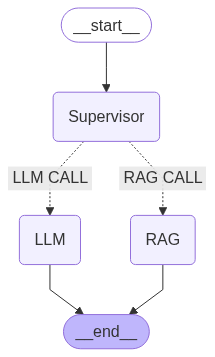

In [239]:
workflow.compile()